In [99]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.decomposition import PCA

In [100]:
data = pd.read_csv("data/Q1/Q1.data", sep = "	", header=0).values

X = data[:, :-1]
y = data[:, -1]


[17, 29, 100, 107, 244, 552, 554, 723, 769, 965, 1015, 1055, 1206, 1298, 1404, 1474]
16


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


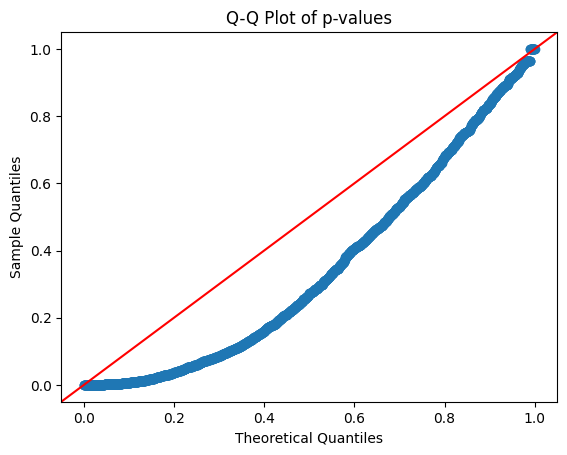

In [101]:
alpha = 0.05 / len(X)

significant_snps = []
all_pvalues = np.array([])

for i in range(len(X[0])):
    snp_i = X[:, i]
    snp_i_with_const = sm.add_constant(snp_i)
    model = sm.OLS(y, snp_i_with_const)
    results = model.fit()

    if results.pvalues[1] <= alpha:
        significant_snps.append(i)
    
    all_pvalues = np.append(all_pvalues, results.pvalues[1])
    

print (significant_snps)
print (len(significant_snps))


sm.qqplot(all_pvalues, dist=uniform, line="45", color="purple")
plt.title("Q-Q Plot of p-values")
plt.show()

<class 'numpy.ndarray'>


Text(0, 0.5, 'PC1')

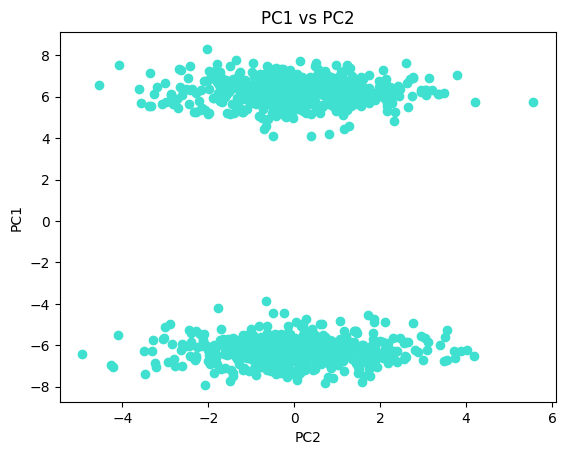

In [102]:
pca = PCA(n_components=2)
pca.fit(X)
reduced = pca.transform(X)
print (type(reduced))

pc1, pc2 = reduced[:, 0], reduced[:, 1]

plt.scatter(pc2, pc1, color="turquoise")
plt.title("PC1 vs PC2")
plt.xlabel("PC2")
plt.ylabel("PC1")

set()
0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


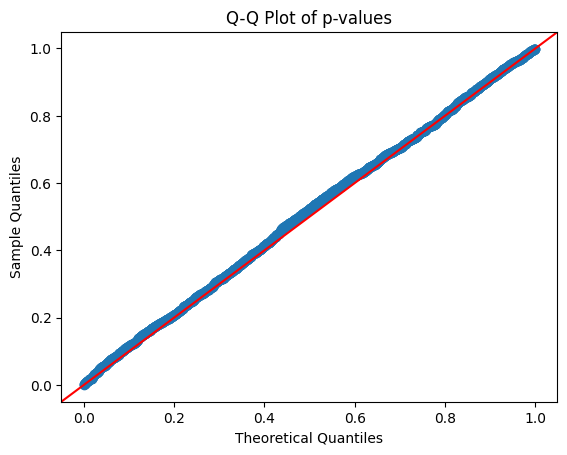

In [103]:
alpha = 0.05 / len(X)

significant_snps = set()
all_pvalues = np.array([])

for i in range(len(X[0])):
    snp_i = X[:, i]
    snp_i_with_pc1 = np.column_stack((snp_i, pc1))
    snp_i_with_pc1_and_const = sm.add_constant(snp_i_with_pc1)
    model = sm.OLS(y, snp_i_with_pc1_and_const)
    results = model.fit()

    if results.pvalues[1] <= alpha:
        significant_snps.add(i)
    
    all_pvalues = np.append(all_pvalues, results.pvalues[1])
    
print (significant_snps)
print (len(significant_snps))


sm.qqplot(all_pvalues, dist=uniform, line="45", color="purple")
plt.title("Q-Q Plot of p-values")
plt.show()